In [271]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### Loading data

In [272]:
df = pd.read_csv('adult.csv')
df.head()
df.shape
df.describe()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


(48842, 15)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [274]:
# Changing hyphen '-' into underscore '_' for  easier data manipulation
col = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income']

for index, value in enumerate(col):
    for j in value:
        if '-' in j:
           col[index] = value.replace('-', '_')

In [275]:
df.columns = col
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [276]:
# find values in columns that are out of place

unique_values_dict = {c: df[c].unique() for c in df}
unique_values_dict


{'age': array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
        37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
        47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
        80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
        76, 84, 89, 88, 87, 86], dtype=int64),
 'workclass': array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
        'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
       dtype=object),
 'fnlwgt': array([226802,  89814, 336951, ..., 129912, 255835, 257302], dtype=int64),
 'education': array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
        'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
        '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
       dtype=object),
 'educational_num': array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1],
       dtype=int64),
 'marital_status': array

In [300]:
# the 'workclass' and 'native_country' have value of '?', that must be removed.

df = df[(df.workclass != '?')]
df = df[df['native_country'] != '?']
df.workclass.unique()
df['native_country'].unique()

# no more '?' in these columns

array(['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

### Data Wrangling

In [301]:
df['age'].unique()

array([25, 38, 28, 44, 34, 63, 24, 55, 65, 36, 26, 48, 43, 20, 37, 45, 22,
       23, 54, 32, 46, 56, 17, 29, 39, 52, 18, 21, 42, 33, 30, 47, 41, 19,
       69, 50, 31, 59, 49, 58, 40, 27, 57, 61, 51, 73, 53, 80, 62, 35, 72,
       64, 68, 66, 60, 67, 71, 70, 90, 77, 81, 74, 78, 82, 75, 85, 76, 89,
       83, 79, 88, 87, 84, 86], dtype=int64)

Create a new column ['Age_Group'] containing age ranges based on values from ['age'] column

In [302]:
df['Age_Group'] = pd.cut(df['age'], bins=(0, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, np.inf),
                         labels=['<25', '25-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71-75','76-80', '80+'])

In [303]:
df['hours_per_week'].max()

99

In [304]:
df['Hours_Group'] = pd.cut(df['hours_per_week'], bins=(0, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100),
                         labels=['<10', '10-15','16-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-70','71-75','76-80','81-85','86-90','91-95','96-100'])

In [305]:
df.head()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income,Age_Group,Hours_Group
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,<25,36-40
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,36-40,46-50
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,25-30,36-40
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,41-45,36-40
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,31-35,26-30


check for NaN values

In [311]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational_num    0
marital_status     0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
Age_Group          0
Hours_Group        0
dtype: int64

## Exploratory Data Analysis

In [512]:
# subset data frame in 2 data frames where income is split for over and under 50K a year

df_under50K = df.loc[df['income'] == '<=50K']
df_over50K = df.loc[df['income'] == '>50K']

df_under50K['income'].value_counts()
df_over50K['income'].value_counts()

income
<=50K    34024
Name: count, dtype: int64

income
>50K    11208
Name: count, dtype: int64

**There are 34024 rows where income is under 50K/year and 11208 rows for income over 50K/year**

In [509]:
count = (df_under50K['capital_gain']).value_counts()[0]
count
df_under50K.shape
df_over50K.shape

32609

(34024, 17)

(11208, 17)

#### There are 32,609 people earning under 50K who have 0 capital gain, therefore the mean capital gain is very low. 



In [513]:
# subset the earners under50K/yr by age and calculate Mean Capital Gain. Repeat the same for earners above 50K a year

under50K_age = df_under50K.groupby('Age_Group').agg(Mean_capital_gain=('capital_gain', np.mean), Mean_capital_loss=('capital_loss', np.mean))
over50K_age = df_over50K.groupby('Age_Group').agg(Mean_capital_gain=('capital_gain', np.mean), Mean_capital_loss=('capital_loss', np.mean))


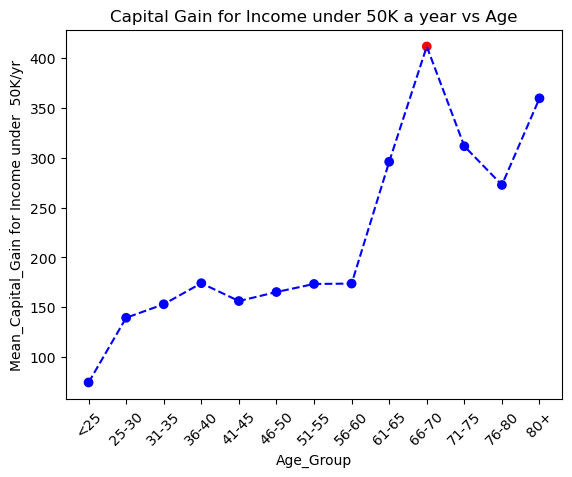

In [514]:
fig, ax = plt.subplots()
ax.scatter(under50K_age.index, under50K_age['Mean_capital_gain'], c=['red' if g == '66-70' else  'blue' for g in under50K_age.index])

plt.plot(under50K_age.index, under50K_age['Mean_capital_gain'], color='blue', linestyle='--')


plt.xlabel('Age_Group')
plt.ylabel('Mean_Capital_Gain for Income under  50K/yr')
plt.title('Capital Gain for Income under 50K a year vs Age')
plt.xticks(rotation=45);
plt.show();

### For income <50K, the 66 to 70 Age group experience highest Capital Gains, shown by red dot

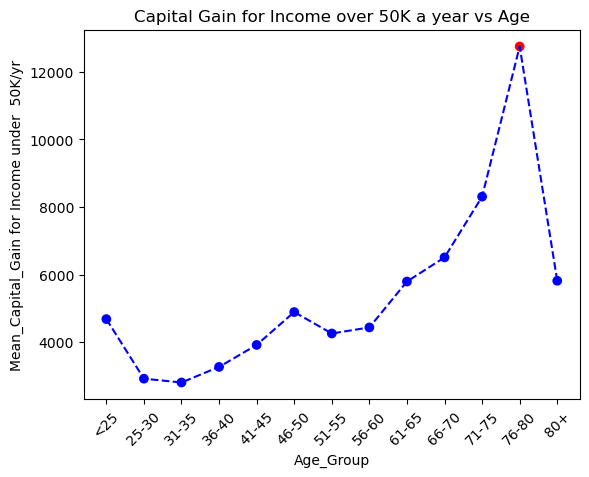

In [518]:
fig, ax = plt.subplots()
ax.scatter(over50K_age.index, over50K_age['Mean_capital_gain'], c=['red' if g == '76-80' else  'blue' for g in over50K_age.index])

plt.plot(over50K_age.index, over50K_age['Mean_capital_gain'], color='blue', linestyle='--')


plt.xlabel('Age_Group')
plt.ylabel('Mean_Capital_Gain for Income under  50K/yr')
plt.title('Capital Gain for Income over 50K a year vs Age')
plt.xticks(rotation=45);
plt.show();

### For income >50K, the 76 to 80 Age group experience highest Capital Gains, shown by red dot
### Earners above 50K have capital gains 10 times higher compare to earners below 50K/year

In [519]:
capital_age = df.groupby('Age_Group').agg(Mean_capital_gain=('capital_gain', np.mean), Mean_capital_loss=('capital_loss', np.mean))

In [520]:
capital_hrs = df.groupby('Hours_Group').agg(Mean_capital_gain=('capital_gain', np.mean), Mean_capital_loss=('capital_loss', np.mean))
p.head(20)

,Mean_capital_gain,Mean_capital_loss
Hours_Group,,
<10,352.978177,57.290116
10-15,186.712140,58.455569
16-20,407.011840,49.912185
21-25,253.149004,46.047809
26-30,462.181656,47.202501
31-35,873.941799,66.492945
36-40,759.848022,80.024108
41-45,1167.981450,113.104737
46-50,1943.050473,123.523659


**Calculate Mean capital Gain vs Age to find out at what age the capital gain is greatest**

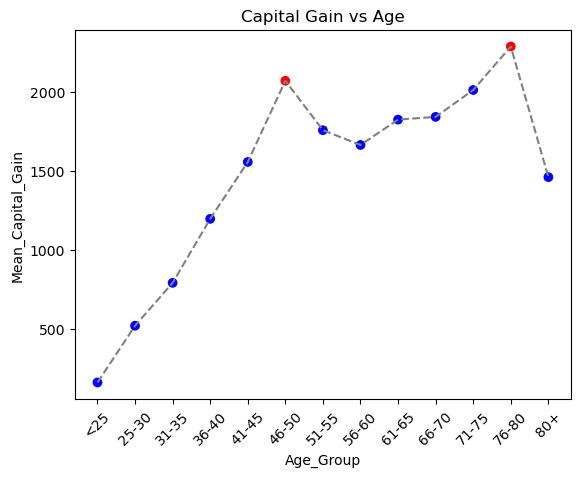

In [398]:
fig, ax = plt.subplots()
ax.scatter(capital_age.index, capital_age['Mean_capital_gain'], c=['red' if g == '46-50' or g == '76-80' else  'blue' for g in capital_age.index])

plt.plot(capital_age.index, capital_age['Mean_capital_gain'], color='gray', linestyle='--')


plt.xlabel('Age_Group')
plt.ylabel('Mean_Capital_Gain')
plt.title('Capital Gain vs Age')
plt.xticks(rotation=45);
plt.show();

**Calculate Mean Capital Gain vs Weekly Hours to find out at how many hours worked in a week result in highest capital gain**

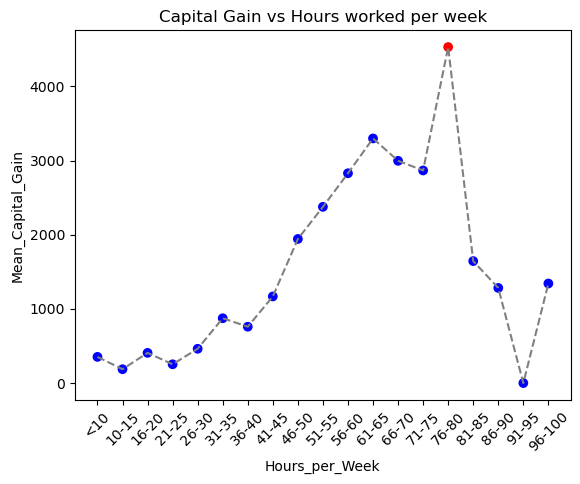

In [634]:
fig, ax = plt.subplots()
ax.scatter(capital_hrs.index, capital_hrs['Mean_capital_gain'], c=['red' if g == '76-80' else  'blue' for g in capital_hrs.index])

plt.plot(capital_hrs.index, capital_hrs['Mean_capital_gain'], color='gray', linestyle='--')


plt.xlabel('Hours_per_Week')
plt.ylabel('Mean_Capital_Gain')
plt.title('Capital Gain vs Hours worked per week')
plt.xticks(rotation=45);
plt.show();

#### About 75 to 80 hrs/week results in highest Capital Gains. Longer hours do not translate into higher capital gains

In [524]:
# subset data frame in 2 data frames where gender is split for male and female

In [537]:
df_female = df.loc[df['gender'] == 'Female']
df_male = df.loc[df['gender'] == 'Male']

df_female['gender'].value_counts()
df_male['gender'].value_counts()

gender
Female    14698
Name: count, dtype: int64

gender
Male    30534
Name: count, dtype: int64

There are 14698 females and 30534 males in df data set. -------- df was split by gender

### Visualize Capital gains by age and separated by gender

In [538]:
w_capital_age = df_female.groupby('Age_Group').agg(Mean_capital_gain=('capital_gain', np.mean), Mean_capital_loss=('capital_loss', np.mean))
m_capital_age = df_male.groupby('Age_Group').agg(Mean_capital_gain=('capital_gain', np.mean), Mean_capital_loss=('capital_loss', np.mean))

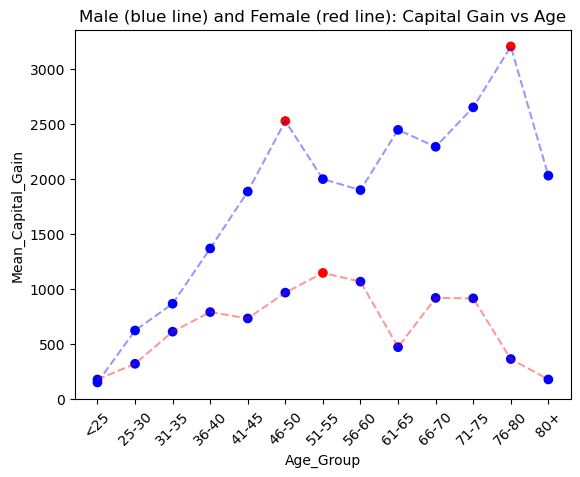

In [562]:
fig, ax = plt.subplots()
ax.scatter(w_capital_age.index, w_capital_age['Mean_capital_gain'], c=['red' if g == '51-55' else 'blue' for g in w_capital_age.index])

plt.plot(w_capital_age.index, w_capital_age['Mean_capital_gain'], color='red', alpha=0.4, linestyle='--')


ax.scatter(m_capital_age.index, m_capital_age['Mean_capital_gain'], c=['red' if g == '46-50'  or g == '76-80' else  'blue' for g in m_capital_age.index])

plt.plot(m_capital_age.index, m_capital_age['Mean_capital_gain'], color='blue',alpha=0.4, linestyle='--')


plt.xlabel('Age_Group')
plt.ylabel('Mean_Capital_Gain')
plt.title('Male (blue line) and Female (red line): Capital Gain vs Age')

plt.xticks(rotation=45)
;
plt.show();

### Plot shows men have higher capital gains than women over their life span.
### As men age, the capital gains increase 
### As women age, the capital gains decrease

In [334]:
df.groupby('gender').agg(Mean_Capital_Gain=('capital_gain', np.mean),Standard_Dev=('capital_gain', np.std))

,Mean_Capital_Gain,Standard_Dev
gender,,
Female,588.012247,5117.241499
Male,1348.211142,8405.956473


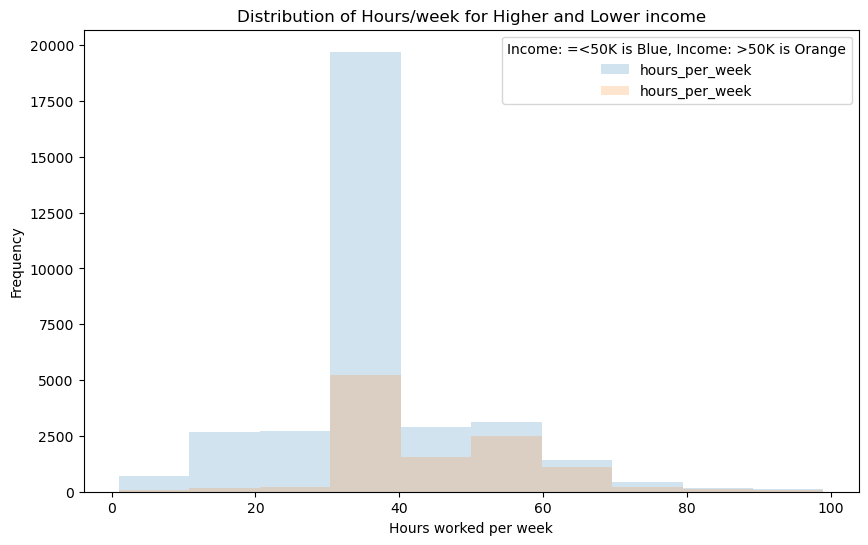

In [635]:
df_under50K['hours_per_week'].plot(kind='hist', alpha=0.2, title='Distribution of Hours/week for Higher and Lower income', figsize = (10,6))
df_over50K['hours_per_week'].plot(kind='hist', alpha = 0.2)
plt.xlabel('Hours worked per week')
plt.ylabel('Frequency')
plt.legend(title='Income: =<50K is Blue, Income: >50K is Orange')
plt.show();

### Earners below 50K/yr have a wider spread in number of weekly hours and also on average work less than 40 hrs a week.
### Earners above 50K/yr have a smaller spread in number of weekly hours and also on average work more than 40 hrs a week.

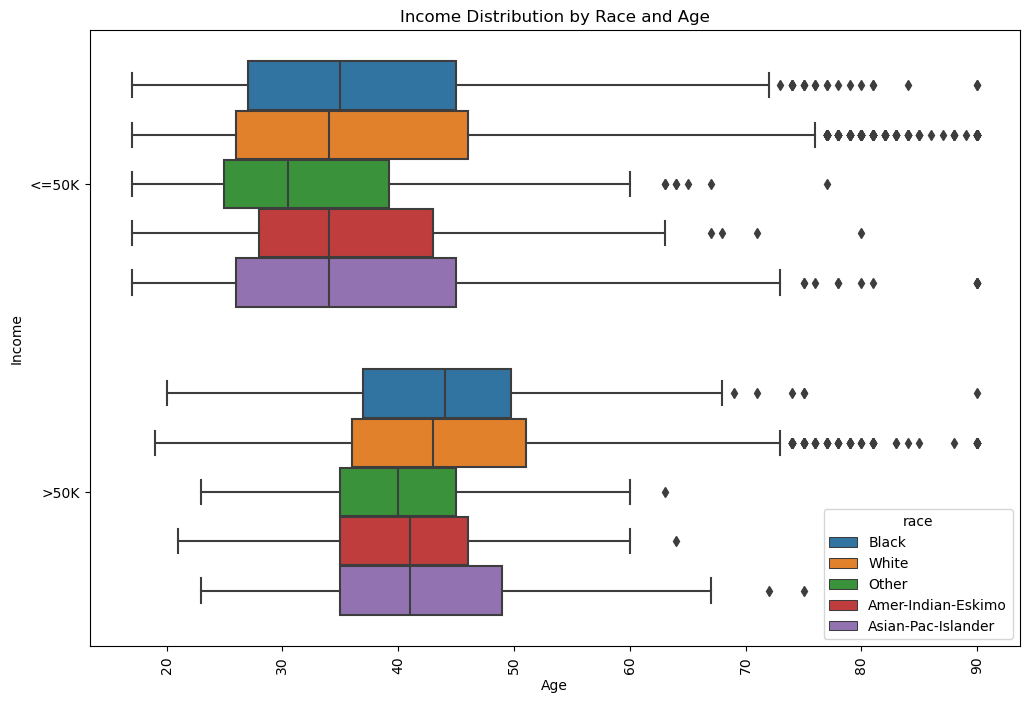

In [615]:
# Create a seaborn boxplot of the Income distribution by age and race
#with 'state' on the x-axis, 'Price' as the y-value, and a hue that indicates 'Ticket'
#This will use boxplot's x, y, hue, and data arguments.
plt.subplots(figsize=(12, 8))
sns.boxplot(x='age', y='income', hue='race', data=df)
plt.title('Income Distribution by Race and Age')
plt.xticks(rotation='vertical')
plt.ylabel('Income')
plt.xlabel('Age');

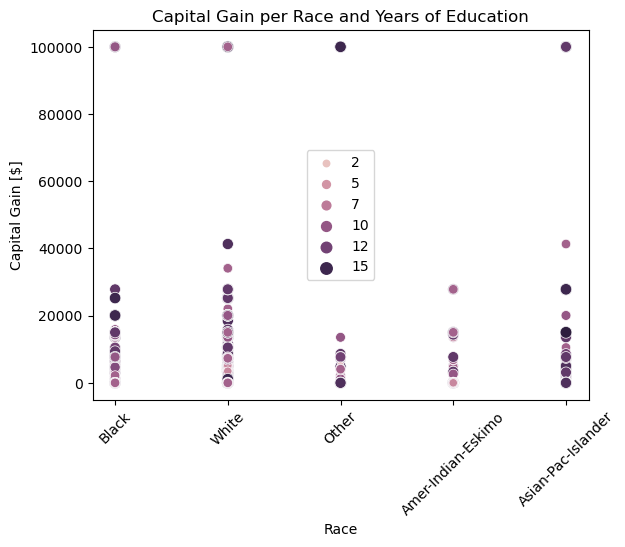

In [616]:
sns.scatterplot(x='race', y='capital_gain', hue = 'educational_num', size='educational_num', data=df)
plt.xlabel('Race')
plt.ylabel('Capital Gain [$]')
plt.xticks(rotation=45)
plt.title('Capital Gain per Race and Years of Education')
plt.legend(loc='center');


<Axes: xlabel='gender', ylabel='count'>

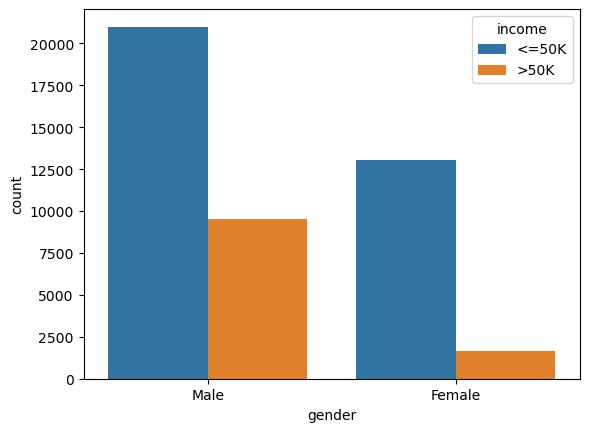

In [594]:

sns.countplot( x = 'gender', hue = 'income', data = df)

 Create a pivot table to analyze the relationship between education levels and gender in the dataset.
 
 Group the data in DataFrame (df_over50K) by the ‘education’ and ‘gender’ columns and calculate the size ( count) of each group.
 
 "reset_index" - This resets the index of the resulting grouped data, converting it back into a DataFrame.
 
 pivot(columns='gender', index='education', values=0): This creates a pivot table with ‘education’ as the index, ‘gender’ as the columns, and the count values as the actual data. 
 
 The values=0 argument specifies that we’re using the count values from the previous step.

In [641]:
edu = df_over50K.groupby(['education', 'gender']).size().reset_index().pivot(columns = 'gender',
                                                                                 index = 'education',
                                                                                 values = 0)

In [642]:
edu['tot'] = edu['Female'] + edu['Male']
edu['perc']= edu['Female'] /edu['tot']

In [643]:
edu.head()

gender,Female,Male,tot,perc
education,,,,
10th,3.0,79.0,82.0,0.036585
11th,11.0,78.0,89.0,0.123596
12th,2.0,41.0,43.0,0.046512
1st-4th,NaN,8.0,NaN,NaN
5th-6th,4.0,18.0,22.0,0.181818


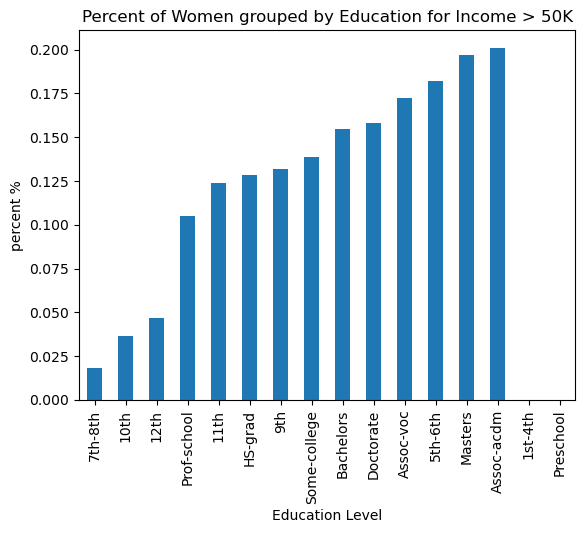

In [644]:
edu.perc.sort_values().plot(kind = 'bar')
plt.xlabel('Education Level')
plt.ylabel('percent %')
plt.title('Percent of Women grouped by Education for Income > 50K');

In [639]:
edu['tot'] = edu['Female'] + edu['Male']
edu['perc']= edu['Male'] /edu['tot']

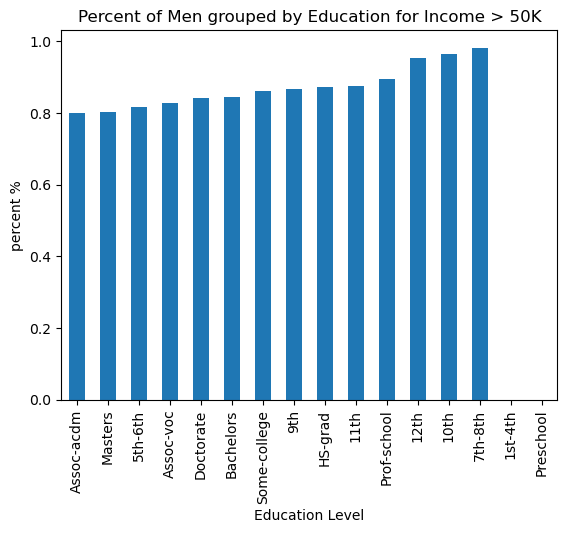

In [640]:
edu.perc.sort_values().plot(kind = 'bar')
plt.xlabel('Education Level')
plt.ylabel('percent %')
plt.title('Percent of Men grouped by Education for Income > 50K');